# Clasificación de documentos con Naive Bayes

En este notebook usamos el algoritmo Naive Bayes para clasificar documentos. Vamos a trabajar con un problema binario. Cada sample será un titular de diario (en inglés) y el objetivo será entrenar un modelo para clasificar cuales son clickbait.

In [ ]:
from google.colab import drive
import csv

drive.mount('/content/drive') # montamos drive y cargamos los datos

filename = '/content/drive/My Drive/LaboDatos2022/clickbait_data.csv'

# este codigo carga cada linea en una lista
with open(filename, newline='\n') as f:
    reader = csv.reader(f)
    data = list(reader)
# como hay lineas en blanco, hay entradas en blanco en la lista
# entonces, itero sobre los elementos y remuevo las entradas en blanco
data_clickbait = []
all_clickbait = ''
for i in data:
  if not i==[]:
    data_clickbait.append(i[0])
    all_clickbait = all_clickbait + i[0]

# ahora hago lo mismo para el otro archivo, que contiene los titulares no clickbait
filename = '/content/drive/My Drive/LaboDatos2022/non_clickbait_data.csv'

with open(filename, newline='\n') as f:
    reader = csv.reader(f)
    data = list(reader)

all_nonclickbait = ''
data_non_clickbait = []
for i in data:
  if not i==[]:
    data_non_clickbait.append(i[0])
    all_nonclickbait = all_nonclickbait + i[0]

MessageError: ignored

Vamos a visualizar algunos ejemplos de cada tipo:

In [ ]:
data_clickbait[0:20]

['Should I Get Bings',
 'Which TV Female Friend Group Do You Belong In',
 'The New "Star Wars: The Force Awakens" Trailer Is Here To Give You Chills',
 'This Vine Of New York On "Celebrity Big Brother" Is Fucking Perfect',
 'A Couple Did A Stunning Photo Shoot With Their Baby After Learning She Had An Inoperable Brain Tumor',
 'How To Flirt With Queer Girls Without Making A Total Fool Of Yourself',
 '32 Cute Things To Distract From Your Awkward Thanksgiving',
 'If Disney Princesses Were From Florida',
 "What's A Quote Or Lyric That Best Describes Your Depression",
 'Natalie Dormer And Sam Claflin Play A Game To See How They\'d Actually Last In "The Hunger Games"',
 '16 Perfect Responses To The Indian Patriarchy',
 '21 Times I Died During The "Captain America: Civil War" Teaser',
 '17 Times Kourtney Kardashian Shut Down Her Own Family',
 'Does Coffee Make You Poop',
 'Who Is Your Celebrity Ex Based On Your Zodiac',
 '17 Hairdresser Struggles Every Black Girl Knows To Be True',
 'Are You

In [ ]:
data_non_clickbait[0:20]

['Bill Changing Credit Card Rules Is Sent to Obama With Gun Measure Included',
 'In Hollywood',
 "1700 runners still unaccounted for in UK's Lake District following flood",
 'Yankees Pitchers Trade Fielding Drills for Putting Practice',
 'Large earthquake rattles Indonesia; Seventh in two days',
 "Coldplay's new album hits stores worldwide this week",
 'U.N. Leader Presses Sri Lanka on Speeding Relief to War Refugees in Camps',
 '2 Somali-Americans Charged With Aiding Terror',
 "US Highway Administration releases interim report on Boston's Big Dig: press release claims tunnel safe",
 'White House Announces International Meetings to Address Energy and Climate Issues',
 'With Troubled Coyotes',
 'Door opens mid-Qantas flight; plane makes an emergency landing',
 'Gas prices surge in Northeast US',
 'Schapelle Corby found guilty',
 '2008 SecuTech Expo starts in Taipei',
 'New year introduces Illinois texting while driving ban',
 'Rod Woodson Tries to Stay Grounded Amid Hall of Fame Talk',


Vemos a primera vista que hay algunas regularidades que distinguen ambos tipos de titulares. Una es el uso de pronombres personales, "you", "we", "I", etc. Otra es la frecuente aparición de números. Vamos a ver si podemos ganar un poco más de insight haciendo nubes de palabras.

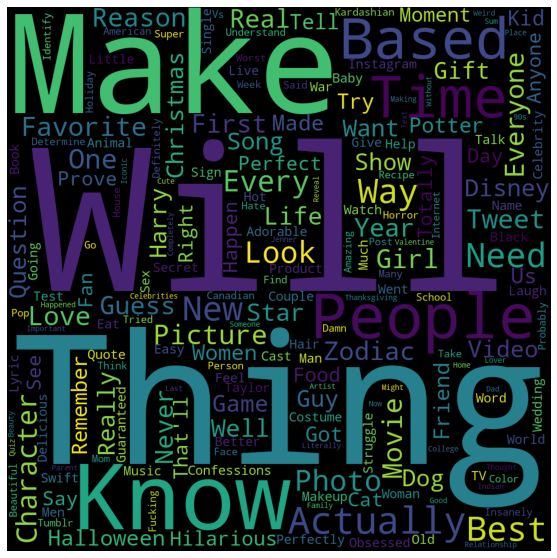

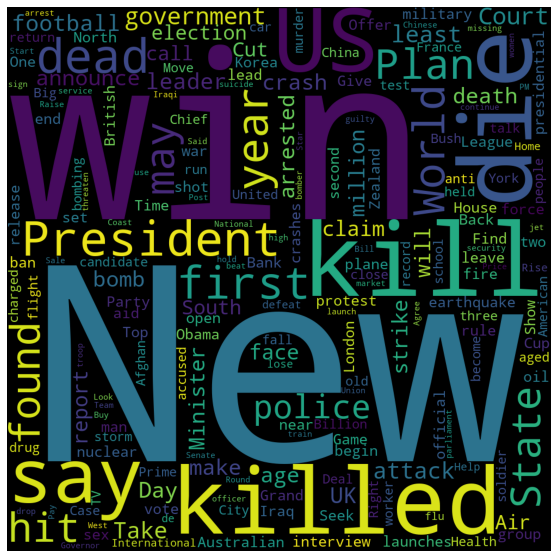

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    # tamanio del wordcloud
    plt.figure(figsize=(10, 10))
    # mostrar wordcloud
    plt.imshow(wordcloud)
    # quitar ejes
    plt.axis("off");

wordcloud = WordCloud(width = 1000, height = 1000, random_state=1,  collocations=False, stopwords=None).generate(all_clickbait)
plot_cloud(wordcloud)

wordcloud = WordCloud(width = 1000, height = 1000, random_state=1,  collocations=False, stopwords=None).generate(all_nonclickbait)
plot_cloud(wordcloud)

# Procesado del texto

Vemos que hay algunas palabras especialmente comunes en cada una de las categorías. Podriamos intentar explotar estas regularidades para armar clasificadores que distingan entre las clases, armando reglas manuales que indiquen a que categoria debe depender cada sample.

En vez de eso, vamos a procesar los datos de la misma forma que venimos haciendo hasta ahora, para usar un algoritmo de machine learning (naive Bayes) que aprenda las categorias en base a la frecuencia de palabras.

Primero nos encargamos de las contracciones.

In [ ]:
print(data_clickbait[0:10])

['Should I Get Bings', 'Which TV Female Friend Group Do You Belong In', 'The New "Star Wars: The Force Awakens" Trailer Is Here To Give You Chills', 'This Vine Of New York On "Celebrity Big Brother" Is Fucking Perfect', 'A Couple Did A Stunning Photo Shoot With Their Baby After Learning She Had An Inoperable Brain Tumor', 'How To Flirt With Queer Girls Without Making A Total Fool Of Yourself', '32 Cute Things To Distract From Your Awkward Thanksgiving', 'If Disney Princesses Were From Florida', "What's A Quote Or Lyric That Best Describes Your Depression", 'Natalie Dormer And Sam Claflin Play A Game To See How They\'d Actually Last In "The Hunger Games"']


In [ ]:
!pip install contractions # instalamos
import contractions # importamos

for n,i in enumerate(data_clickbait):
  data_clickbait[n] = contractions.fix(i)

for n,i in enumerate(data_non_clickbait):
  data_non_clickbait[n] = contractions.fix(i)

data_clickbait[0:5]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 8.8 MB/s 
     |████████████████████████████████| 106 kB 45.6 MB/s 


['Should I Get Bings',
 'Which TV Female Friend Group Do You Belong In',
 'The New "Star Wars: The Force Awakens" Trailer Is Here To Give You Chills',
 'This Vine Of New York On "Celebrity Big Brother" Is Fucking Perfect',
 'A Couple Did A Stunning Photo Shoot With Their Baby After Learning She Had An Inoperable Brain Tumor']

Seguimos removiendo signos de puntuacion.

In [ ]:
import re       # libreria de expresiones regulares
import string   # libreria de cadena de caracteres

# Defino una funcion que recibe un texto y devuelve el mismo texto sin signos,
def clean_text_round1(text):
    # pasa las mayusculas del texto a minusculas
    text = text.lower()
    # reemplaza texto entre corchetes por espacio en blanco.. ¿ y \% no se..
    text = re.sub('\[.*?¿\]\%', ' ', text)
    # reemplaza signos de puntuacion por espacio en blanco.. %s -> \S+ es cualquier caracter que no sea un espacio en blanco
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    # remueve palabras que contienen numeros.
    text = re.sub('\w*\d\w*', '', text)
    return text

for n,i in enumerate(data_clickbait):
  data_clickbait[n] = clean_text_round1(i)

for n,i in enumerate(data_non_clickbait):
  data_non_clickbait[n] = clean_text_round1(i)

data_clickbait[0:5]


['should i get bings',
 'which tv female friend group do you belong in',
 'the new  star wars  the force awakens  trailer is here to give you chills',
 'this vine of new york on  celebrity big brother  is fucking perfect',
 'a couple did a stunning photo shoot with their baby after learning she had an inoperable brain tumor']

Otra ronda de limpieza.

In [ ]:
# Hacemos una segunda vuelta de limpieza
def clean_text_round2(text):
    # Sacamos comillas, los puntos suspensivos, <<, >>
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text

for n,i in enumerate(data_clickbait):
  data_clickbait[n] = clean_text_round2(i)

for n,i in enumerate(data_non_clickbait):
  data_non_clickbait[n] = clean_text_round2(i)

data_clickbait[0:5]

['should i get bings',
 'which tv female friend group do you belong in',
 'the new  star wars  the force awakens  trailer is here to give you chills',
 'this vine of new york on  celebrity big brother  is fucking perfect',
 'a couple did a stunning photo shoot with their baby after learning she had an inoperable brain tumor']

Ahora vamos a lematizar (sin POS tagging para que sea mas rapido) y vamos a armar dos versiones de los datos: con y sin remocion de stopwords.

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() # funcion para lematizar
nltk.download('stopwords') # hay que descargar este modulo en particular
sw = nltk.corpus.stopwords.words('english') # lista de stopwords

def lemma_remove_sw(text):
  words = text.split(' ') # separamos por espacios
  words_clean = []
  for w in words:
    if not w in sw: # si no es stopword, agregamos la version lematizada
      words_clean.append(lemmatizer.lemmatize(w))
  return ' '.join(words_clean)

def lemma(text):
  words = text.split(' ') # separamos por espacios
  words_clean = []
  for w in words:
      words_clean.append(lemmatizer.lemmatize(w))
  return ' '.join(words_clean)

data_clickbait_with_stopword = []
data_non_clickbait_with_stopword = []

for n,i in enumerate(data_clickbait):
  data_clickbait[n] = lemma_remove_sw(i)
  data_clickbait_with_stopword.append(lemma(i))

for n,i in enumerate(data_non_clickbait):
  data_non_clickbait[n] = lemma_remove_sw(i)
  data_non_clickbait_with_stopword.append(lemma(i))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Veamos como queda.

In [ ]:
print(data_clickbait[0:5])
print(data_clickbait_with_stopword[0:5])

['get bings', 'tv female friend group belong', 'new  star war  force awakens  trailer give chill', 'vine new york  celebrity big brother  fucking perfect', 'couple stunning photo shoot baby learning inoperable brain tumor']
['should i get bings', 'which tv female friend group do you belong in', 'the new  star war  the force awakens  trailer is here to give you chill', 'this vine of new york on  celebrity big brother  is fucking perfect', 'a couple did a stunning photo shoot with their baby after learning she had an inoperable brain tumor']


# Featurizacion

Ahora vamos a featurizar el texto para poder aplicar el algoritmo Naive Bayes. Primero, vamos a armar una lista que contenga todos los titulares en cada una de sus entradas (tanto clickbait como no clickbait). Luego, armamos un vector de targets que tendrá 0 en los lugares donde es clickbait y 1 en los lugares donde no es clickbait. Finalmente, vamos a pasar de texto a un vector de cuentas de palabras, donde ordenamos a todo el vocabulario (un feature por palabra) y el valor correspondiente es la cantidad de veces que esa palabra aparece en todos los titulares. Esto es suficiente para el computo de las probabilidades que usa Naive Bayes.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

data = data_clickbait + data_non_clickbait # junto las dos listas
data_sw = data_clickbait_with_stopword + data_non_clickbait_with_stopword # idem para el caso con stopwords
label = np.array([0]*len(data_clickbait) + [1]*len(data_non_clickbait)) # armo el vector de etiquetas

counter = CountVectorizer(stop_words=None) # ahora armo el vectorizer. no uso la opcion de remover stopwords porque ya los removi en un paso anterior
allX = counter.fit_transform(data) # transformo
allX_sw = counter.fit_transform(data_sw) # transformo


# Validacion cruzada

Ahora, vamos a separar parte de los datos para evaluacion final del modelo, y vamos a hacer una validacion cruzada con el parametero de suavizado Laplaciano, alpha.

Primero armo los folds, especifico los valores de alpha que voy a recorrer, y separo los datos en conjuntos de entrenamiento y evaluacion.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

skf = StratifiedKFold(n_splits=5, shuffle=True) # 5 folds es un número típico si tenemos suficientes datos. Pedimos shuffle=True para que sea al azar la separación en subgrupos
skf.get_n_splits(allX, label) # arma los folds a partir de los datos

alpha_values = np.arange(0.01,1,0.01) # valores de alpha
auc_values = [] # aca es donde van a ir a parar los AUCs de cada fold para el caso sin stopwords
auc_values_sw = [] # aca es donde van a ir a parar los AUCs de cada fold para el caso con stopwords


# separo en ambos datasets
X, finalX, y, finaly= train_test_split(allX, label)
X_sw, finalX_sw, y_sw, finaly_sw = train_test_split(allX_sw, label)



Ahora voy a moverme sobre el parametro alpha y para cada valor voy a hacer la validacion cruzada y guardar el AUC obtenido, tanto para los modelos con y sin stopwords.

In [ ]:
y = np.array(y)
for alpha in alpha_values: # me muevo en alpha
  print(alpha)
  auc_temp = [] # aca guardo los auc de cada fold para luego promediar
  auc_temp_sw = [] # idem para caso con stopwords
  for train_index, test_index in skf.split(X, y): # va generando los indices que corresponden a train y test en cada fold
      X_train, X_test = X[train_index], X[test_index] # arma que es dato de entrenamiento y qué es dato de evaluación
      y_train, y_test = y[train_index], y[test_index]  # idem con los targets
      mnb = MultinomialNB(alpha=alpha) # armo el clasificador Naive Bayes
      mnb.fit(X_train, y_train) # entreno
      probas = mnb.predict_proba(X_test) # estimo probabilidades
      auc_temp.append(roc_auc_score(y_test, probas[:,1])) #  AUC con datos de evaluación
      ## repito para el caso con stopwords
      X_train, X_test = X_sw[train_index], X_sw[test_index] # arma que es dato de entrenamiento y qué es dato de evaluación
      y_train, y_test = y_sw[train_index], y_sw[test_index]  # idem con los targets
      mnb = MultinomialNB(alpha=alpha)
      mnb.fit(X_train, y_train)
      probas = mnb.predict_proba(X_test)
      auc_temp_sw.append(roc_auc_score(y_test, probas[:,1])) #  AUC con datos de evaluación
  auc_values.append(np.mean(auc_temp)) # asigno el promedio de los AUC
  auc_values_sw.append(np.mean(auc_temp_sw))  # asigno el promedio de los AUC


0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09
0.09999999999999999
0.11
0.12
0.13
0.14
0.15000000000000002
0.16
0.17
0.18000000000000002
0.19
0.2
0.21000000000000002
0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36000000000000004
0.37
0.38
0.39
0.4
0.41000000000000003
0.42000000000000004
0.43
0.44
0.45
0.46
0.47000000000000003
0.48000000000000004
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.5800000000000001
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.7100000000000001
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.8400000000000001
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.9600000000000001
0.97
0.98
0.99


Finalmente voy a plotear las curvas de AUC vs. alpha para los dos modelos.

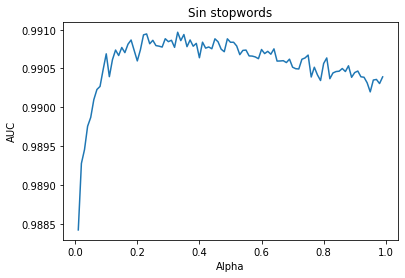

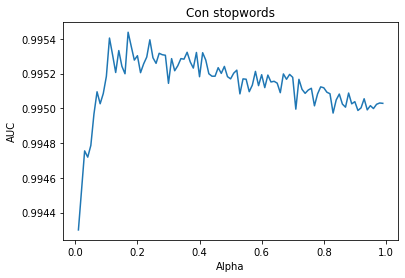

In [ ]:
plt.figure()
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.title('Sin stopwords')
plt.plot(alpha_values, auc_values)
plt.figure()
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.title('Con stopwords')
plt.plot(alpha_values, auc_values_sw)

# Evaluacion en el conjunto hold out

Finalmente, voy a plotear la curva ROC para el conjunto de entrenamiento, para el modelo sin stopwords y con el alpha optimo de 0.15. Tambien muestro como se ve una matriz de confusion tipica para el modelo.

AUC: 0.9909
[[3806  149]
 [ 260 3747]]


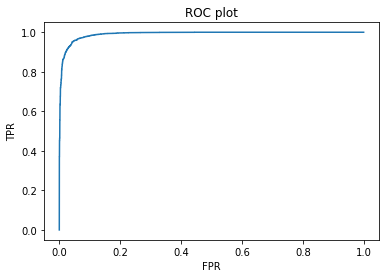

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB(alpha=0.15)
mnb.fit(X, y)
probas = mnb.predict_proba(finalX)
fpr, tpr, thresholds = roc_curve(finaly, probas[:,1]) # para plotear curva ROC con datos de entrenamiento
plt.figure()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC plot')
plt.plot(fpr,tpr)
print('AUC: {}'.format(round(roc_auc_score(finaly, probas[:,1]),4)))

print(confusion_matrix(finaly, mnb.predict(finalX)))

